# Recording a Gesture for Shimi

First, run the cell below to instatiate the shimi object. It should move to its initial positions and then relax.

**There's currently an issue where every other time the pypot motor library is run it crashes. Re-run the cell in this case.**

In [6]:
# Import some matplolib shortcuts for Jupyter notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from shimi import *
import time
import datetime

from copy import deepcopy

import os

# Load Shimi model. Contains motor definitions and angle limits.
shimi = Shimi('config/shimi_robot_model.json')

# Allow the motors to be moved by hand.
shimi.make_compliant()

local_gestures = {}

Setting motors to starting positions {1: 10, 2: -21.599999999999994, 3: 0, 4: -11.85, 5: 5.41}


If you need to re-run the first cell, you must first close the connection to the motors by running this cell.

In [10]:
# Closes the serial connection to the motors
shimi.close()

The next cell gets a `recorder` object and starts a recording!

In the call to `get_recorder()`, you need to provide a list of motors you want to record from. The motors can be referenced as follows:
- `shimi.all_motors`
  - **This returns a list**, so no need to wrap this attribute when calling `get_recorder()`
- `shimi.torso`
- `shimi.neck_ud`
- `shimi.neck_lr`
- `shimi.phone`
- `shimi.foot`

In the call to `make_recording()`, edit the `wait_time` (time from when you run the cell to when it starts, in **integer** seconds) and the `recording_time` (in seconds, can be float) accordingly.

3...
2...
1...
Starting to record!
Recording stopped.
487 frames recorded.


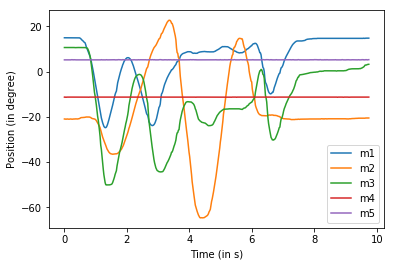

In [7]:
# Get a recorder object for Shimi
recorder = shimi.get_recorder(shimi.all_motors)

# Make the recording
recorder = shimi.make_recording(recorder, wait_time=3, recording_time=10.0)

# Plot the recording
recorder.move.plot(plt.axes())

To play the recording you just made run the following cell.

In [8]:
shimi.play_recordings([recorder.move])

If you are happy with that recording, hold onto it by running the following cell, **changing the name in the dictionary the recorder is being assigned to**! This is **only saving the gesture in memory in the python notebook** so if you want to save to disk, look at the next cell.

In [ ]:
# Change the string here or risk overwriting a previous gesture!!
name = 'myGesture'
local_gestures[name] = deepcopy(recorder.move)
print("Saved gesture " + name + " in this notebook.")

You can make sure it plays back by running the following cell.

In [ ]:
shimi.play_recordings([local_gestures[name]])

To save the recording to disk, run the following cell. It will save to 'recorded_gestures/name-timestamp.move`.

In [ ]:
ts = time.time()
timestamp = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d_%H:%M:%S')
foldername = '/home/nvidia/shimi/recorded_getsures'
filename = name + '-' + timestamp + '.move'

with open(os.path.join(foldername, filename), 'w') as f:
    local_gestures[name].save(f)
    
print("Saved gesture to " + os.path.join(foldername, filename))    

Here are some helper functions.

In [ ]:
# Puts shimi in a neutral position with motors non-compliant
shimi.initial_position()

## **Make sure Shimi will not collapse before you run this!!!**

In [9]:
# Makes the motors compliant
shimi.make_compliant()

In [ ]:
for m in shimi.all_motors:
    m.goto_behavior = 'dummy'